<h1>AI-Machine Learning Project</h1>

<h2>Pahse 0: EDA</h2>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Question 1**

In [2]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()
diabetes.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,635.000000,654.000000,680.000000,624.000000,680.000000,684.000000,590.000000,655.000000,768.000000
mean,3.700787,113.422018,68.786765,20.386218,80.123529,32.083626,0.466676,33.157252,0.348958
std,3.518126,202.816831,19.724841,15.987049,115.681140,7.800741,0.322408,13.829831,0.476951
min,-22.000000,-5000.000000,-2.000000,0.000000,0.000000,0.000000,0.078000,-150.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.375000,0.243250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.300000,0.368000,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,129.250000,36.600000,0.611500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.329000,81.000000,1.000000



<div dir='ltl'>
With describe method, We can see the count, mean, standard deviation, min, max and quartiles of numerical values.</br>
</div>

In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               635 non-null    float64
 1   Glucose                   654 non-null    float64
 2   BloodPressure             680 non-null    float64
 3   SkinThickness             624 non-null    float64
 4   Insulin                   680 non-null    float64
 5   BMI                       684 non-null    float64
 6   DiabetesPedigreeFunction  590 non-null    float64
 7   Age                       655 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


<div dir='ltl'>
With info method, We can see the names of columns, their data type and the numbers of non-null values</br>
</div>

**Question 2**

In [4]:
for col in diabetes.columns:
    NaNCount = diabetes[col].isnull().sum()
    print(col, 'NaN values :', NaNCount, 'percentage of NaN value :', NaNCount/len(diabetes) *100 , '%')

Pregnancies NaN values : 133 percentage of NaN value : 17.317708333333336 %
Glucose NaN values : 114 percentage of NaN value : 14.84375 %
BloodPressure NaN values : 88 percentage of NaN value : 11.458333333333332 %
SkinThickness NaN values : 144 percentage of NaN value : 18.75 %
Insulin NaN values : 88 percentage of NaN value : 11.458333333333332 %
BMI NaN values : 84 percentage of NaN value : 10.9375 %
DiabetesPedigreeFunction NaN values : 178 percentage of NaN value : 23.177083333333336 %
Age NaN values : 113 percentage of NaN value : 14.713541666666666 %
Outcome NaN values : 0 percentage of NaN value : 0.0 %


**Question 3**
<div dir='ltl'>
As we can see in the plot, BMI, Pregnancies, DiabetesPedigreeFunction have the most dependancies on Outcome.</br>
</div>

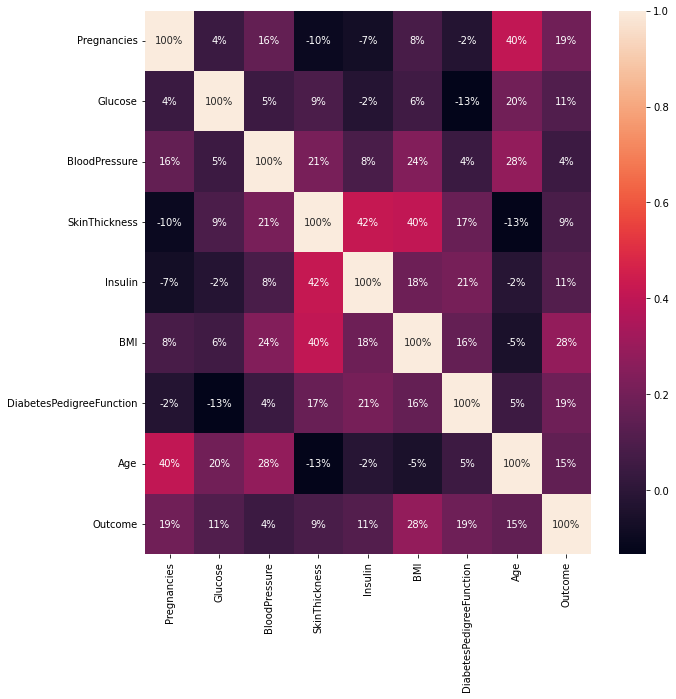

In [5]:
#plot heatmap
plt.figure(figsize=(10,10))
sns.heatmap(diabetes.corr(), annot=True, fmt='.0%')
plt.show()


**Question 4**

<Figure size 720x360 with 0 Axes>

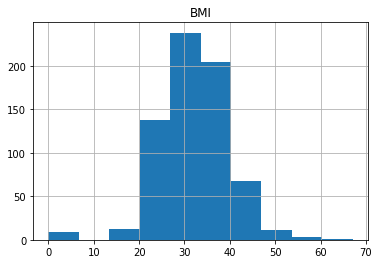

<Figure size 720x360 with 0 Axes>

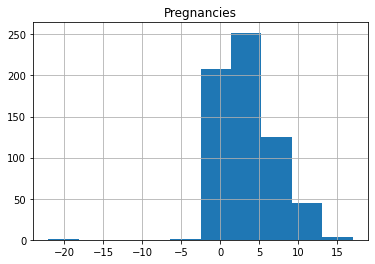

<Figure size 720x360 with 0 Axes>

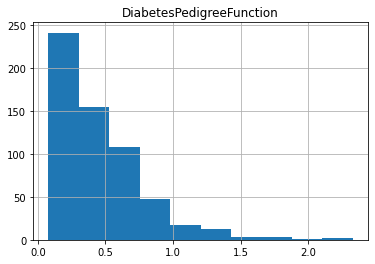

In [6]:
#plot frequency of each unique value 
dependentFeatures = [ 'BMI', 'Pregnancies', 'DiabetesPedigreeFunction']
for feature in dependentFeatures:
    plt.figure(figsize=(10,5))
    diabetes.hist(column=feature)
    plt.show()

**Question 5**


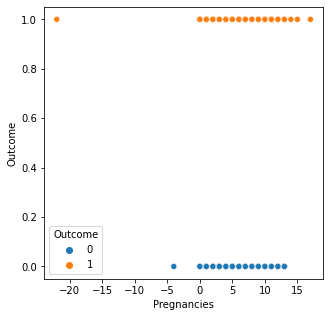

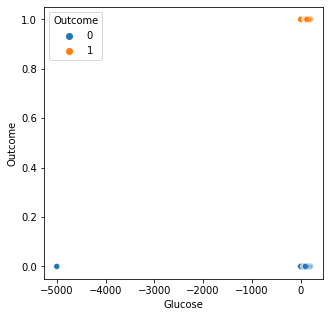

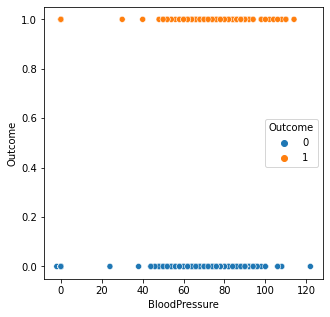

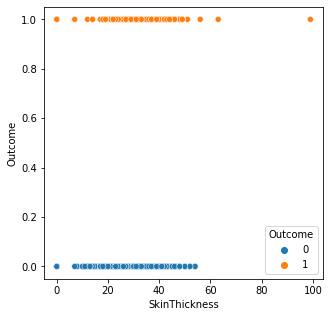

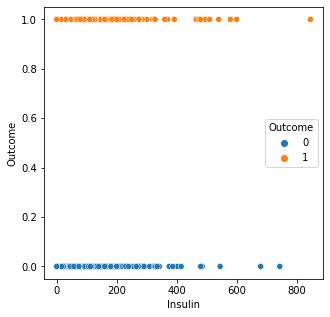

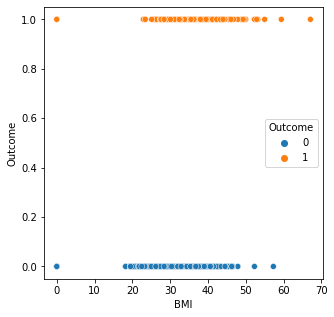

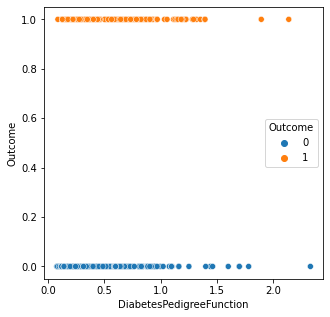

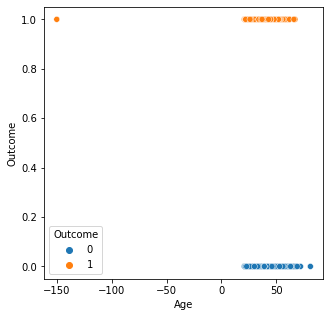

In [7]:
#scatter plot
features = ['Pregnancies', 'Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
rowsCount = diabetes.shape[0]

for feature in features:
    plt.figure(figsize=(5,5))
    sns.scatterplot(x=diabetes[feature], y=diabetes['Outcome'], hue=diabetes['Outcome'])
    plt.show()

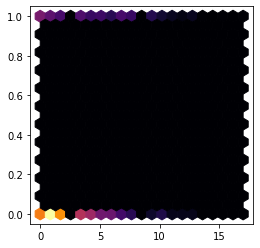

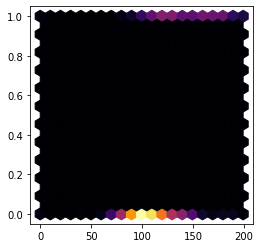

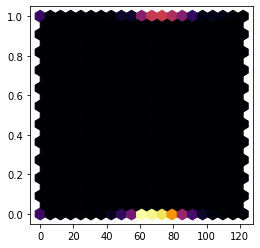

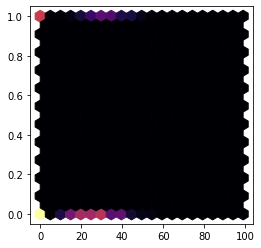

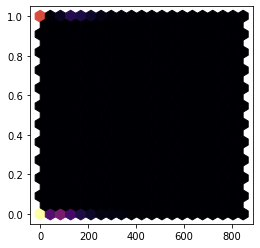

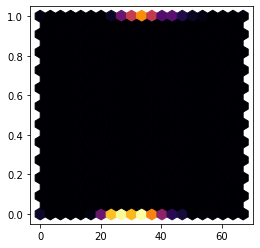

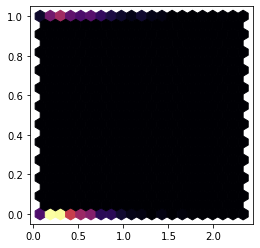

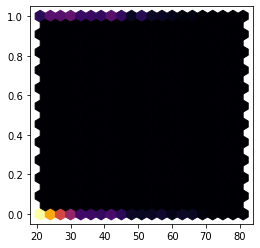

In [87]:
for feature in features:
    plt.figure(figsize=(4,4))
    plt.hexbin(diabetes[feature], diabetes['Outcome'], gridsize=20, cmap='inferno')
    plt.show()

<h2> Phase 1: Preprocessing </h2>

In [9]:
deletedRows = []
for i in range(rowsCount):
    for feature in features:
        if diabetes[feature][i] < 0:
            deletedRows.append(i)
diabetes.drop(deletedRows, axis = 0,inplace=True)
X = diabetes.loc[:, features]
y = diabetes.loc[:, ['Outcome']]

<div dir='ltl'>
first we drop rows with values less than zero (only 5 rows) and then we will seperate X and y from dataset. (X = dataset without Outcome & y = Outcome of dataset).
</div>

**Question 1**
<div dir='ltl'>
We can fill missing values with mean, median or mode. Filling missing data with a mean or median value is applicable when the columns involved have integer or float data types. While inserting the mean and median values affects the entire DataFrame, inserting the modal value doesn't. Using  fillna() function, fills each missing row with the value of the nearest one above it and  bfill method fills each missing row in the DataFrame with the nearest value below it. </br>
Another way is to drop the whole column, or row which might result in loosing a large part of data, Althogh it can be useful in cases that missing data doesn't participate in outcome and is unique or the number of NaN values is low. </br>
We can also fill missing values with the mean of its nearest neighbors, We can use KNNImputer which is in sklearn to do so.
</div>

**Question 2**
<div dir='ltl'>
According to the last phase, "DiabetesPedigreeFunction", "Pregnancies", "Glucose", and "Age" have the most number of NaN values. In this project We will fill the NaN values with mean because all values are float. 
</div>

In [10]:
#fill NanN values
from sklearn.impute import KNNImputer
def fillNanValues(mean = True, mod = False, median = False, knnImputer = False):
    if knnImputer:
        imputer = KNNImputer(n_neighbors=2, copy = False)
        imputer.fit_transform(X)
    else:
        for col in X.columns:
            if mean:
                X[col].fillna(X[col].mean(), inplace=True)
            elif mod:
                X[col].fillna(X[col].mode(), inplace=True)
            elif median:
                X[col].fillna(X[col].median(), inplace=True)
    
fillNanValues(mean=True, mod=False, median = False, knnImputer=True)
X.isna().sum()
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,5.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,4.0,137.0,40.0,35.0,168.0,37.3,0.699,33.0


**Question 3**
<div dir='ltl'>
Normalization (Min-Max Scaling) is a scaling technique which is used to used to transform features to be on a similar scale. The values end up ranging between 0 and 1 or sometimes -1 to 1. Normalization is good when the distribution of the data is not Gaussian. </br>
Standardization (Z-Score Normalization) is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation. Actually it is the transformation of features by subtracting from mean and dividing by standard deviation. It can be helpful in cases where the data follows a Gaussian distribution. Unlike normalization, standardization does not have a bounding range and doesn't get affected by outliers. In this project, We use standardization method because our numerical values follow a guassian distribution.
</div>

In [11]:
#standardization
import sklearn.preprocessing as preprocessing
def standardizeOrNormalizeData(X, standardize=True, normalize=False):
    if standardize:
        scaler = preprocessing.StandardScaler()
        X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    elif normalize:
        scaler = preprocessing.Normalizer()
        X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    return X
# scaler = preprocessing.StandardScaler()
# X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X = standardizeOrNormalizeData(X, standardize=True, normalize=False)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.709005,0.870059,0.147475,0.967391,-0.724201,0.234249,0.575319,1.457402
1,-0.859026,-1.113901,-0.171363,0.573832,-0.724201,-0.705386,-0.355220,-0.208644
2,0.395399,1.972259,-0.277642,-1.328367,-0.724201,-1.148356,0.727037,-0.120957
3,-0.859026,-0.987935,-0.171363,0.180274,0.117585,-0.504035,-0.975579,-1.085510
4,0.081792,0.523653,-1.552994,0.967391,0.780267,0.730913,0.818068,-0.033270


**Question 4**
<div dir='ltl'>
One Hot Encoding : It adds new columns for each categorical value and produces group of bits with a single 1 bit for the correct categorical value and all the others bits are 0. </br>
Dummy Encoding : It is similar to One Hot Encoding but it drops othe columns that can be inferred from the other columns.</br>
Label Encoding: It assigns numbers to each categorical value. </br>
Label Encoding isn't a good approach when we have no particular ordering in our categories and One Hot Encoding uses so much memory So we should use them based on our dataset. </br>
We don't have non-numeric values in our dataset so we don't use these methods.

</div>

**Question 5**
<div dir='ltl'>
We can drop columns with low correlation with Outcome including BloodPressure, and SkinThickness.

</div>

In [12]:
X.drop(labels = ['BloodPressure', 'SkinThickness'], axis = 1, inplace=True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12, test_size=0.1)

**Question 6**
<div dir='ltl'>
There is no optimal percentage for splitting of our modelling dataset into training and testing data but common split percentages are: Train: 80%, Test: 20%
---Train: 67%, Test: 33% ---Train: 50%, Test: 50%. </br>
If the number of  training data is low, the machine learning model will show high variance in training. With less testing data, your model will have greater variance. </br>
In Repeatable Train-Test Splits, rows are assigned to the train and test sets randomly. In this case datasets are a random sample of the original dataset. When we want to coompare machine learning algorithms we can fix the seed of random_generation. Random sampling works optimally on class-balanced datasets, Otherwise it may generate a bias. In this case, we can use stratified train-test split which preserves the same proportions of examples in each class as observed in the original dataset.

</div>

**Question 7**
<div dir='ltl'>
We use the validation data which is a set of examples for tunning the parameters of a classifier; We can use the validation data for choosing the number of hidden units in a neural network.
Validation data is a sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters.
</div>

<h2> Phase 2: Model Training, Evaluation and Hyper Parameter Tuning </h2>

**K Nearest Neighbors**

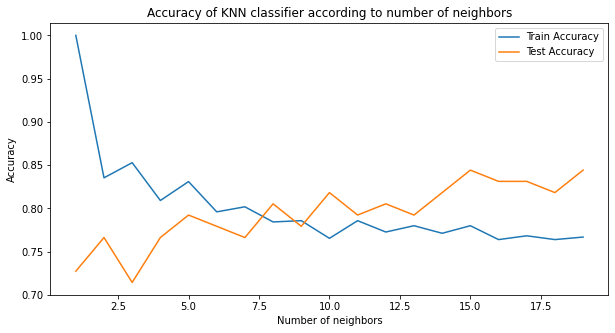

In [13]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

neighborsCount = range(1, 20)
trainAccuracy = []
testAccuracy = []
for i in neighborsCount:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train.values.ravel())
    trainAccuracy.append(knn.score(X_train, y_train))
    testAccuracy.append(knn.score(X_test, y_test))
plt.figure(figsize=(10, 5))
plt.plot(neighborsCount, trainAccuracy, label='Train Accuracy')
plt.plot(neighborsCount, testAccuracy, label='Test Accuracy')
plt.legend()
plt.title('Accuracy of KNN classifier according to number of neighbors')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [14]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train.values.ravel())
knn_y_pred = knn.predict(X_test)
print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))
print(classification_report(y_test, knn_y_pred))


Accuracy of KNN classifier on test set: 0.84
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        50
           1       0.83      0.70      0.76        27

    accuracy                           0.84        77
   macro avg       0.84      0.81      0.82        77
weighted avg       0.84      0.84      0.84        77



**Decision Tree**

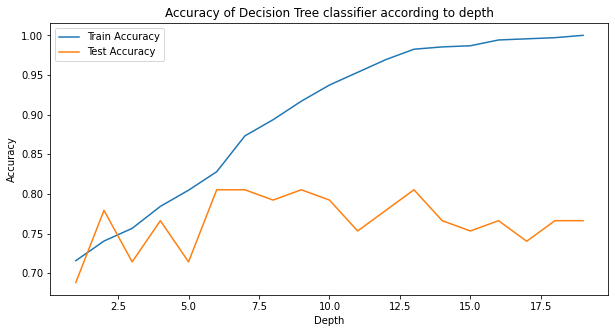

In [15]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
depths = range(1, 20)
trainAccuracy = []
testAccuracy = []
for i in depths:
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train, y_train.values.ravel())
    trainAccuracy.append(dt.score(X_train, y_train))
    testAccuracy.append(dt.score(X_test, y_test))
plt.figure(figsize=(10, 5))
plt.plot(depths, trainAccuracy, label='Train Accuracy')
plt.plot(depths, testAccuracy, label='Test Accuracy')
plt.legend()
plt.title('Accuracy of Decision Tree classifier according to depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()


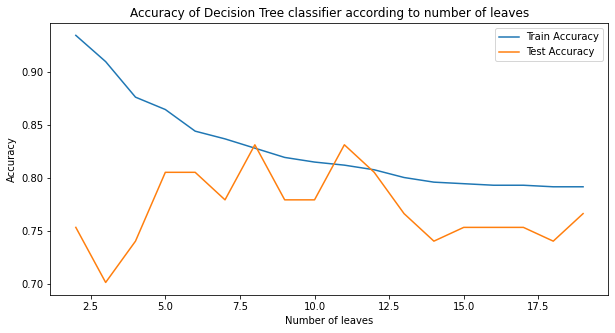

In [16]:
leaves = range(2, 20)
trainAccuracy = []
testAccuracy = []
for i in leaves:
    dt = DecisionTreeClassifier(min_samples_leaf=i)
    dt.fit(X_train, y_train.values.ravel())
    trainAccuracy.append(dt.score(X_train, y_train))
    testAccuracy.append(dt.score(X_test, y_test))
plt.figure(figsize=(10, 5))
plt.plot(leaves, trainAccuracy, label='Train Accuracy')
plt.plot(leaves, testAccuracy, label='Test Accuracy')
plt.legend()
plt.title('Accuracy of Decision Tree classifier according to number of leaves')
plt.xlabel('Number of leaves')
plt.ylabel('Accuracy')
plt.show()


In [21]:
tree = DecisionTreeClassifier(max_depth=6, min_samples_leaf=11, random_state=66)
tree.fit(X_train,y_train)
tree_y_pred = tree.predict(X_test)
print(classification_report(y_test, tree_y_pred))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(tree.score(X_test, y_test)))


              precision    recall  f1-score   support

           0       0.84      0.94      0.89        50
           1       0.86      0.67      0.75        27

    accuracy                           0.84        77
   macro avg       0.85      0.80      0.82        77
weighted avg       0.85      0.84      0.84        77

Accuracy of Decision Tree classifier on test set: 0.84


**Logistic Regression**

In [22]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
logr = LogisticRegression()
logr.fit(X_train, y_train.values.ravel())
logr_y_pred = logr.predict(X_test)
print(classification_report(y_test, logr_y_pred))
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'.format(logr.score(X_test, y_test)))


              precision    recall  f1-score   support

           0       0.85      0.88      0.86        50
           1       0.76      0.70      0.73        27

    accuracy                           0.82        77
   macro avg       0.80      0.79      0.80        77
weighted avg       0.82      0.82      0.82        77

Accuracy of Logistic Regression classifier on test set: 0.82


**Question 1**
<div dir='ltl'>
As we can see in the confusion matrix showed below, all models work well in predicting "0" label, but they are not good at predicting "1" label and Logistic Regression is the worst in labeling "1".
</div>

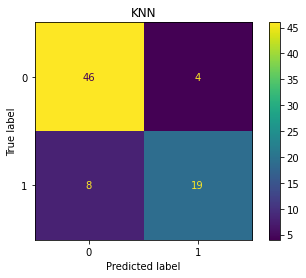

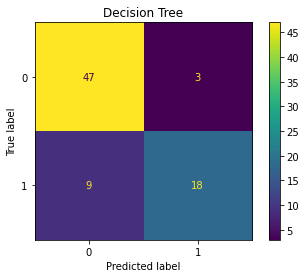

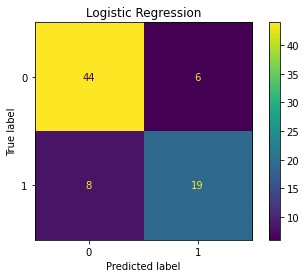

In [23]:
#plot confusion matrix
predictedModels = {'KNN': knn_y_pred, 'Decision Tree': tree_y_pred, 'Logistic Regression': logr_y_pred}
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def plot_confusion_matrix(y_test, y_pred, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(cm).plot()
    cm_display.ax_.set_title(title)
    plt.show()
for model, y_pred in predictedModels.items():
    plot_confusion_matrix(y_test, y_pred, title=model)


**Question 2**

In [29]:
#grid search cv for logistic regression
def gridSearchCV():
    gridSearchResults = { 'Decision Tree' : {}, 'Logistic Regression' : {}, 'KNN' : {} }

    tree = DecisionTreeClassifier()
    treeParameters = {
    'max_depth' : range(1, 20),
    'min_samples_leaf' : range(2, 20),
    'criterion' : ['gini', 'entropy'],
    'min_samples_split' : range(2, 20),
    'splitter' : ['best', 'random']
    }
    treeGrid = GridSearchCV(tree,param_grid = treeParameters, scoring='accuracy', cv=5)
    treeGrid.fit(X_train, y_train.values.ravel())
    gridSearchResults['Decision Tree']['best_score'] = treeGrid.best_score_
    gridSearchResults['Decision Tree']['best_params'] = treeGrid.best_params_
    gridSearchResults['Decision Tree']['best_test_score'] = treeGrid.score(X_test, y_test)

    logr = LogisticRegression()
    logrParameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'penalty': ['l2']}
    logrGrid = GridSearchCV(logr,param_grid = logrParameters, scoring='accuracy', cv=5) 
    logrGrid.fit(X_train,y_train.values.ravel())
    gridSearchResults['Logistic Regression']['best_score'] = logrGrid.best_score_   
    gridSearchResults['Logistic Regression']['best_params'] = logrGrid.best_params_
    gridSearchResults['Logistic Regression']['best_test_score'] = logrGrid.score(X_test, y_test)

    knn = KNeighborsClassifier()
    knnParameters = { 
    'n_neighbors' : range(1, 20),
    'weights' : ['uniform', 'distance'], 
    'metric' : ['euclidean', 'manhattan'], 
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : range(1, 20),
    'p': [1, 2] }
    knnGrid = GridSearchCV(knn,param_grid = knnParameters, scoring='accuracy', cv=5)
    knnGrid.fit(X_train,y_train.values.ravel())
    gridSearchResults['KNN']['best_score'] = knnGrid.best_score_
    gridSearchResults['KNN']['best_params'] = knnGrid.best_params_
    gridSearchResults['KNN']['best_test_score'] = knnGrid.score(X_test, y_test)

    for model, result in gridSearchResults.items():
        print(model, 'Best test score: ', result['best_test_score'])
        print(model, 'Best score: ', result['best_score'])
        print(model, 'Best parameters: ', result['best_params'])
        print('')

gridSearchCV()



Decision Tree Best test score:  0.7402597402597403
Decision Tree Best score:  0.7639267957262246
Decision Tree Best parameters:  {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 16, 'min_samples_split': 15, 'splitter': 'random'}

Logistic Regression Best test score:  0.7922077922077922
Logistic Regression Best score:  0.7536760816671957
Logistic Regression Best parameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

KNN Best test score:  0.7922077922077922
KNN Best score:  0.7478789802179202
KNN Best parameters:  {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'euclidean', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}



**Question 3**
<div dir='ltl'>
Overfitting: Overfitting happens when the model corresponds too closely to fit the train data so it can't work well in test data which is unknown to the model. in ovefitting, the model starts caching noise and inaccurate values present in the dataset and has low bias and high variance. The more we train our model, the more overfitting happens. We can reduce overfitting in our model by doing: Cross-Validation, Training with more data, Removing features, Early stopping the training, and Regularization.</br>
Underfitting: If we stop training eraly, the chance of underfitiing increases and the model is not able to learn enough. An underfitted model has high bias and low variance. We can reduce the chance of underfitting of our model by: increasing the training time of the model and increasing the number of features.</br>
overfitting and underfitting have not happended in our modeling since the difference between test score and train score in gridSearchCv is low; That is because the gridSearchCv split train data into train and cross validation data and decide the value of hyperparameters with cross validation data, thus it prevents overfitting.

</div>

**Question 4**

<div dir='ltl'>
I make some changes in preprocessing phase including changing the random_state and split percentage for test data to gain better accuracy.
</div>

<h2>Pahse 3: Ensemble Methods </h2>

**Random Forest**
<div dir='ltl'>
A simple random forest (without any hyperparameter tuning) would look like below:
</div>

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_forest = RandomForestClassifier(random_state=6)
random_forest.fit(X_train, y_train.values.ravel())
randomForest_y_pred = random_forest.predict(X_test)
print(classification_report(y_test, randomForest_y_pred))
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(random_forest.score(X_test, y_test)))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        50
           1       0.80      0.74      0.77        27

    accuracy                           0.84        77
   macro avg       0.83      0.82      0.83        77
weighted avg       0.84      0.84      0.84        77

Accuracy of Random Forest classifier on test set: 0.84


**Question 1**
<div dir='ltl'>
We will name some of the random forest's hyperparameters and their definitions below: </br>
1) n_estimators: number of trees in the foreset </br>
2) max_features: max number of features considered for splitting a node </br>
3) max_depth: max number of levels in each decision tree </br>
4) min_samples_split: min number of data points placed in a node before the node is split </br>
5) min_samples_leaf: min number of data points allowed in a leaf node </br>
6) bootstrap: Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
</div>

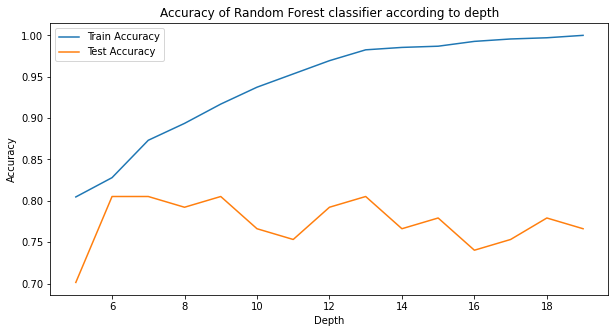

In [26]:
trainAccuracy = []
testAccuracy = []
depths = range(5, 20)
for depth in range(5, 20):
    randomForest = DecisionTreeClassifier(max_depth=depth)
    randomForest.fit(X_train, y_train.values.ravel())
    trainAccuracy.append(randomForest.score(X_train, y_train))
    testAccuracy.append(randomForest.score(X_test, y_test))
plt.figure(figsize=(10, 5))
plt.plot(depths, trainAccuracy, label='Train Accuracy')
plt.plot(depths, testAccuracy, label='Test Accuracy')
plt.legend()
plt.title('Accuracy of Random Forest classifier according to depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

<div dir='ltl'>
As we can see, Train accuracy increases with increasing the depth in random forest model, and also overfitting happens in depths > 16
</div>

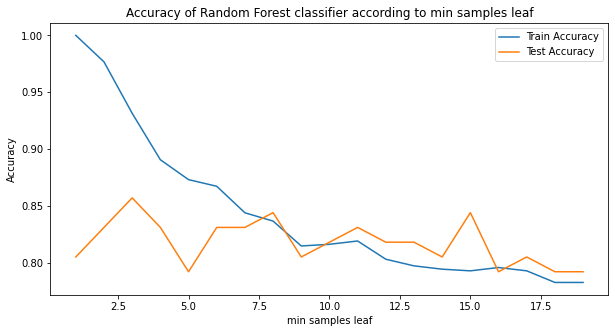

In [27]:
trainAccuracy = []
testAccuracy = []
stimators = range(5, 20)
samples_leaves = range(1, 20)

for sample_leaf in samples_leaves:
    randomForest_estimators = RandomForestClassifier( min_samples_leaf=sample_leaf)
    randomForest_estimators.fit(X_train, y_train.values.ravel())
    trainAccuracy.append(randomForest_estimators.score(X_train, y_train))
    testAccuracy.append(randomForest_estimators.score(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(samples_leaves, trainAccuracy, label='Train Accuracy')
plt.plot(samples_leaves, testAccuracy, label='Test Accuracy')
plt.legend()
plt.title('Accuracy of Random Forest classifier according to min samples leaf')
plt.xlabel('min samples leaf')
plt.ylabel('Accuracy')
plt.show()

<div dir='ltl'>
As we can see, Train accuracy decresing with increasing the minimum number of samples required to be at a leaf node in random forest model, by incresing this feature we make some limitations so the accuracy of the train data decreases.
</div>

In [41]:
random_forest  = RandomForestClassifier()
randomForestParameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(5,10),
    'min_samples_split' : range(2,6),
    'min_samples_leaf' : range(1,4)
}
randomForestGrid = GridSearchCV(random_forest,param_grid = randomForestParameters, scoring='accuracy')
randomForestGrid.fit(X_train, y_train.values.ravel())
randomForestGridPredict = randomForestGrid.predict(X_test)

print('Random Forest Best test score: ', randomForestGrid.score(X_test, y_test) * 100)
print('Random Forest Best parameters: ', randomForestGrid.best_params_)
print('Random Forest Best score: ', randomForestGrid.best_score_ * 100)



Random Forest Best test score:  79.22077922077922
Random Forest Best parameters:  {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 4}
Random Forest Best score:  74.78789802179202


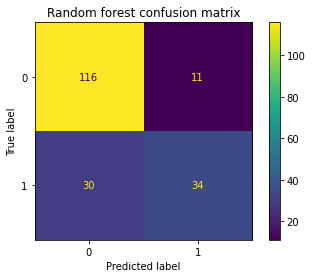

In [ ]:
randomForestGridPredict = randomForestGrid.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, randomForestGridPredict)
plt.title("Random forest confusion matrix")
plt.show()

In [85]:
#bias and variance in decision tree
#bias and variance in random forest
from mlxtend.evaluate import bias_variance_decomp

X.head()

#tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=16, min_samples_split=15, splitter='random')
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train.values.ravel())
treePrediction = tree.predict(X_test)
treeBias =abs(np.mean(treePrediction) - np.mean(y_test.values)) 

random_forest = RandomForestClassifier(criterion= 'gini', max_depth = 8, min_samples_leaf= 3, min_samples_split= 3)
random_forest.fit(X_train, y_train.values.ravel())

error_tree, bias_tree, var_tree = bias_variance_decomp(tree, X_train.values, y_train.values, X_test.values, y_test.values, loss='mse', random_seed=1)
print('Decision Tree average bias: %.3f' %  treeBias)
print('Decision Tree average variance: %.3f' % var_tree)
print('')

error_random_forest, bias_random_forest, var_random_forest = bias_variance_decomp(random_forest, X_train.values, y_train.values.ravel(), X_test.values, y_test.values.ravel(), loss='mse', random_seed=1)
print('Random Forest average bias: %.3f' % bias_random_forest)
print('Random Forest average variance: %.3f' % var_random_forest)

Decision Tree average bias: 0.065
Decision Tree average variance: 0.150

Random Forest average bias: 0.141
Random Forest average variance: 0.061


<div dir='ltl'>
Decision Tree model will tend to have high variance but lower bias because it fits well to the train data. High bias can cause an algorithm to miss the relevant relations between features and target outputs and may cause underfiting but in Decision Tree modeling, we train the model well (if the depth is high enough) so the bias is low. In Random Forest model, we have set of predictions so the probability of overfitting is low and we can have better accuracy on test data so the variance is low. We shoulf have a trade-off between low bias and low variance in our models and precent both underfitting and overfitting. The results showed above is the same as we expected.
</div>